<a href="https://colab.research.google.com/github/rutuja-patil24/CMPE-255-Data_Mining/blob/main/Assignment_11/c)_Gradient_Boost_Ranking_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
# Install necessary libraries
!pip install xgboost lightgbm catboost

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Load the datasets
from google.colab import files
uploaded_train = files.upload()
uploaded_test = files.upload()

train_data = pd.read_csv(list(uploaded_train.keys())[0])
test_data = pd.read_csv(list(uploaded_test.keys())[0])

# Display basic info
print(train_data.info())
print(test_data.info())


Saving Large_Movie_Review_sentiments.train.csv to Large_Movie_Review_sentiments.train (1).csv


Saving Large_Movie_Review_sentiments.test.csv to Large_Movie_Review_sentiments.test (1).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  25000 non-null  object
 1   Label   25000 non-null  object
dtypes: object(2)
memory usage: 390.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  25000 non-null  object
 1   Label   25000 non-null  object
dtypes: object(2)
memory usage: 390.8+ KB
None


In [38]:
# Encode labels
label_encoder = LabelEncoder()
train_data['Label'] = label_encoder.fit_transform(train_data['Label'])
test_data['Label'] = label_encoder.transform(test_data['Label'])

# Convert text data to TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train = tfidf_vectorizer.fit_transform(train_data['Review'])
X_test = tfidf_vectorizer.transform(test_data['Review'])
y_train = train_data['Label']
y_test = test_data['Label']


In [39]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Initialize models
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
lgbm_model = LGBMClassifier()
catboost_model = CatBoostClassifier(verbose=0)

# Train XGBoost
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)

# Train LightGBM
lgbm_model.fit(X_train, y_train)
lgbm_predictions = lgbm_model.predict(X_test)

# Train CatBoost
catboost_model.fit(X_train, y_train)
catboost_predictions = catboost_model.predict(X_test)

# Evaluate Models
print("XGBoost Classification Report:\n", classification_report(y_test, xgb_predictions))
print("LightGBM Classification Report:\n", classification_report(y_test, lgbm_predictions))
print("CatBoost Classification Report:\n", classification_report(y_test, catboost_predictions))


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [00:32:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 12500, number of negative: 12500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 1.377211 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 418810
[LightGBM] [Info] Number of data points in the train set: 25000, number of used features: 4997
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.94     12500
           1       0.92      0.96      0.94     12500

    accuracy                           0.94     25000
   macro avg       0.94      0.94      0.94     25000
weighted avg       0.94      0.94      0.94     25000

LightGBM Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.91   

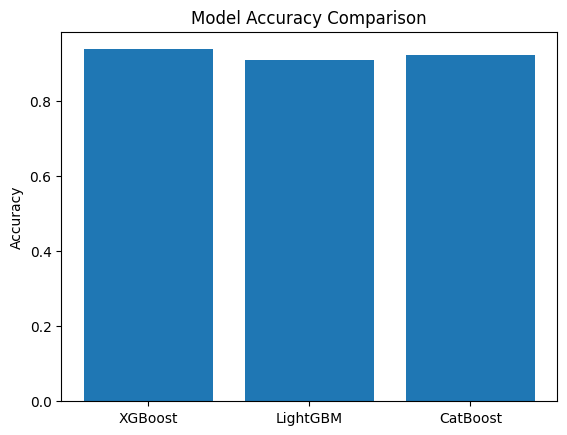

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Calculate accuracies
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
lgbm_accuracy = accuracy_score(y_test, lgbm_predictions)
catboost_accuracy = accuracy_score(y_test, catboost_predictions)

# Plot the results
models = ['XGBoost', 'LightGBM', 'CatBoost']
accuracies = [xgb_accuracy, lgbm_accuracy, catboost_accuracy]

plt.bar(models, accuracies)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()


In [41]:
# Save results for further analysis
pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies
}).to_csv('model_accuracies.csv', index=False)

# Download the file
from google.colab import files
files.download('model_accuracies.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>